Using TensorFlow backend.
1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)


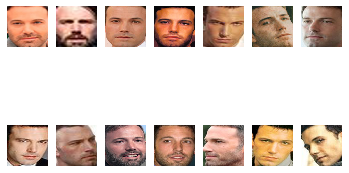

In [1]:
from os import listdir
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN


#extract a single face
def extract_face(filename, required_size=(160, 160)):
    image = Image.open(filename)
    image = image.convert('RGB')
    pixels = np.asarray(image)

    detector = MTCNN()
    results = detector.detect_faces(pixels)
    
    #first face
    x1, y1, width, height = results[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    #extract face
    pixels_face = pixels[y1:y2, x1:x2]
    image_face = Image.fromarray(pixels_face)
    image_face = image_face.resize(required_size)
    pixels_face_result = np.asarray(image_face)

    return pixels_face_result

folder = 'data/train/ben_afflek/'
# folder = 'test_myface/'
i = 1

for filename in listdir(folder):
    path = folder + filename
    face = extract_face(path)
    print(i, face.shape)

    #plot
    plt.subplot(2, 7, i)
    plt.axis('off')
    plt.imshow(face)
    i+=1
plt.show()

In [6]:
data = np.load('data/processed_data_Xtrain_ytrain_Xtest_ytest.npz')

In [12]:
X_train, y_train = data['arr_0'], data['arr_1']
X_test, y_test = data['arr_2'], data['arr_3']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((93, 160, 160, 3), (93,), (25, 160, 160, 3), (25,))

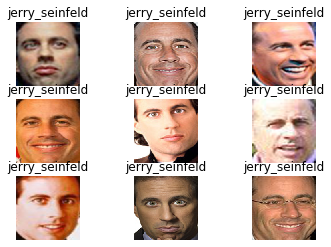

In [18]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.axis('off')
    plt.title(y_train[i])
    plt.imshow(X_train[i])
    i+=1

In [26]:
dir = ''
for i in range(X_test.shape[0]):
    img = Image.fromarray(X_test[i])
    img.save(dir + str(i) + y_test[i] + '.jpg')

In [22]:
X_train.shape[0]

93

In [27]:
face_pixels = X_train[0].astype('float32')

In [28]:
face_pixels.shape

(160, 160, 3)

In [30]:
samples = np.expand_dims(face_pixels, axis=0)

In [31]:
samples.shape

(1, 160, 160, 3)

In [33]:
face_pixels

array([[[ 21.,  18.,  22.],
        [ 19.,  17.,  21.],
        [ 15.,  15.,  19.],
        ...,
        [ 33.,  45.,  60.],
        [ 36.,  48.,  64.],
        [ 38.,  50.,  66.]],

       [[ 19.,  17.,  22.],
        [ 17.,  16.,  21.],
        [ 14.,  14.,  19.],
        ...,
        [ 33.,  45.,  60.],
        [ 36.,  48.,  64.],
        [ 38.,  50.,  66.]],

       [[ 14.,  14.,  24.],
        [ 13.,  13.,  23.],
        [ 11.,  11.,  21.],
        ...,
        [ 33.,  47.,  62.],
        [ 36.,  50.,  66.],
        [ 38.,  52.,  68.]],

       ...,

       [[  1.,  16.,  53.],
        [  1.,  16.,  51.],
        [  1.,  17.,  48.],
        ...,
        [104.,  81.,  69.],
        [105.,  85.,  75.],
        [106.,  87.,  77.]],

       [[  3.,  17.,  54.],
        [  3.,  17.,  52.],
        [  3.,  18.,  49.],
        ...,
        [108.,  84.,  69.],
        [113.,  92.,  78.],
        [115.,  95.,  82.]],

       [[  3.,  17.,  54.],
        [  3.,  17.,  52.],
        [  3.,  

In [34]:
y_train[0]

'jerry_seinfeld'

In [37]:
y_train.shape

(93,)

In [38]:
mean, std = face_pixels.mean(), face_pixels.std()

In [41]:
face_pixels = (face_pixels - mean) / std

In [42]:
face_pixels

array([[[-1.6428237 , -1.6950359 , -1.6254196 ],
        [-1.6776319 , -1.71244   , -1.6428237 ],
        [-1.7472482 , -1.7472482 , -1.6776319 ],
        ...,
        [-1.4339746 , -1.2251257 , -0.9640644 ],
        [-1.3817624 , -1.1729134 , -0.8944481 ],
        [-1.3469542 , -1.1381053 , -0.85963994]],

       [[-1.6776319 , -1.71244   , -1.6254196 ],
        [-1.71244   , -1.7298441 , -1.6428237 ],
        [-1.7646523 , -1.7646523 , -1.6776319 ],
        ...,
        [-1.4339746 , -1.2251257 , -0.9640644 ],
        [-1.3817624 , -1.1729134 , -0.8944481 ],
        [-1.3469542 , -1.1381053 , -0.85963994]],

       [[-1.7646523 , -1.7646523 , -1.5906115 ],
        [-1.7820563 , -1.7820563 , -1.6080155 ],
        [-1.8168645 , -1.8168645 , -1.6428237 ],
        ...,
        [-1.4339746 , -1.1903175 , -0.92925626],
        [-1.3817624 , -1.1381053 , -0.85963994],
        [-1.3469542 , -1.1032971 , -0.8248318 ]],

       ...,

       [[-1.9909053 , -1.7298441 , -1.085893  ],
        [-1

In [43]:
from tensorflow.keras.models import load_model

In [44]:
model = load_model('model/facenet_keras.h5')

In [45]:
yhat = model.predict(samples)

In [47]:
yhat.shape

(1, 128)

In [48]:
embedding = yhat[0]

array([ 0.02274888,  0.31323513,  0.01447723,  0.37460095, -0.23433141,
        0.5259983 ,  0.39841664, -1.0590644 , -0.9938727 , -1.6464174 ,
        0.29902902, -0.9343637 , -0.00991537,  1.4440461 , -0.1086107 ,
       -1.4172984 ,  0.8498422 , -1.5888019 , -0.10354449, -1.5539169 ,
        0.38590634, -2.9687493 ,  0.25033727,  0.32980803,  1.0459476 ,
        2.0837755 ,  1.5952407 ,  0.44719937, -0.8188245 , -2.0837288 ,
       -0.6574755 ,  2.6161435 , -1.5730175 ,  0.53611106,  0.34337965,
        0.39406487,  1.4960299 , -1.2942076 ,  1.1941373 ,  1.5178131 ,
        0.09809677,  0.55982095,  0.24400876, -0.13083337, -1.4451839 ,
        1.7770303 ,  1.0298057 ,  0.4862323 ,  0.8628304 , -1.5678483 ,
        0.7842126 ,  1.2423333 ,  1.039866  ,  0.57649493,  0.90718114,
        3.2589073 ,  1.0538089 , -1.2007633 ,  2.0713582 ,  0.9153991 ,
       -0.87828535,  0.1987703 ,  0.72381353,  0.20586513, -0.08070399,
        0.34119594,  1.046885  , -0.20264488,  0.4348571 ,  1.32

(160, 1, 160, 3)